# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [3]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [6]:
#SEU CÓDIGO AQUI
df = pd.read_csv('CARRO_CLIENTES.csv', delimiter=',')

 #Verificando os dados
print(df.info())
print(df.isnull().sum())
print(df.columns)

# Removendo coluna ID (se existir)
if "ID" in df.columns:
    df = df.drop("ID", axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None
User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64
Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [7]:
#SEU CÓDIGO AQUI
# =============================
# 2. LabelEncoder em Gender
# =============================
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])# Se a coluna "Gender" for categórica, aplicar LabelEncoder
if "Gender" in df.columns:
    le = LabelEncoder()
    df["Gender_enc"] = le.fit_transform(df["Gender"])
    df = df.drop("Gender", axis=1)

print(df.head())

   User ID  Age  AnnualSalary  Purchased  Gender_enc
0      385   35         20000          0           1
1      681   40         43500          0           1
2      353   49         74000          0           1
3      895   40        107500          1           1
4      661   25         79000          0           1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

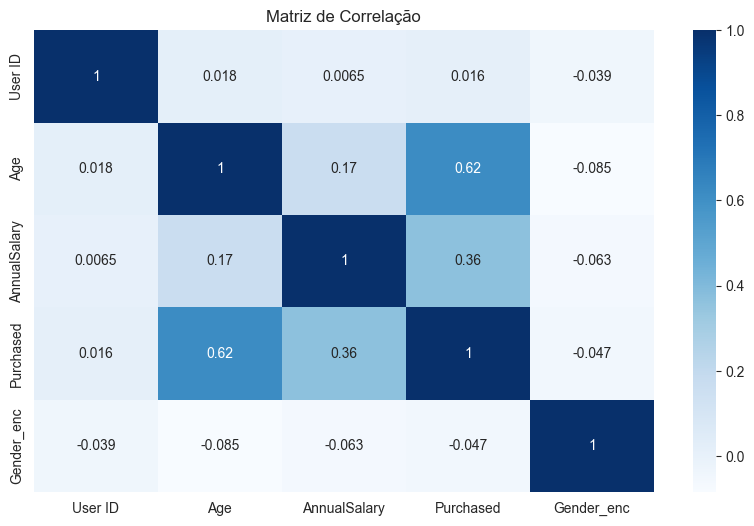

Purchased       1.000000
Age             0.616036
AnnualSalary    0.364974
User ID         0.015911
Gender_enc     -0.047211
Name: Purchased, dtype: float64


In [8]:
#SEU CÓDIGO AQUI
# =============================
# 3. Matriz de correlação
# =============================
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()

# Exibir correlação da target
if "Purchased" in df.columns:  # Ajuste se o nome da target for diferente
    print(corr["Purchased"].sort_values(ascending=False))

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [11]:
#SEU CÓDIGO AQUI
# =============================
# 4. Separação em X e Y
# =============================
# Definir X e y
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [16]:
#SEU CÓDIGO AQUI
# =============================
# 5. Treinar modelo XGBoost
# =============================
# Modelo com hiperparâmetros básicos
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
print("Modelo treinado com sucesso!")


# Treinamento
model.fit(X_train, y_train)

Modelo treinado com sucesso!


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [15]:
#SEU CÓDIGO AQUI
# =============================
# 6. Previsões + probabilidades
# =============================
y_pred_proba = model.predict_proba(X_test)[:,1]  # Probabilidade da classe 1
print(y_pred_proba[:10])

[0.9825549  0.9888805  0.00379588 0.6150217  0.6323681  0.99587315
 0.02135877 0.9370431  0.9649203  0.40488827]


In [ ]:
# Probabilidades
y_prob = model.predict_proba(X_test)[:,1]  # probabilidade da classe 1
print(y_prob[:10])

# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

Acurácia: 0.9133333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       179
           1       0.88      0.91      0.89       121

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



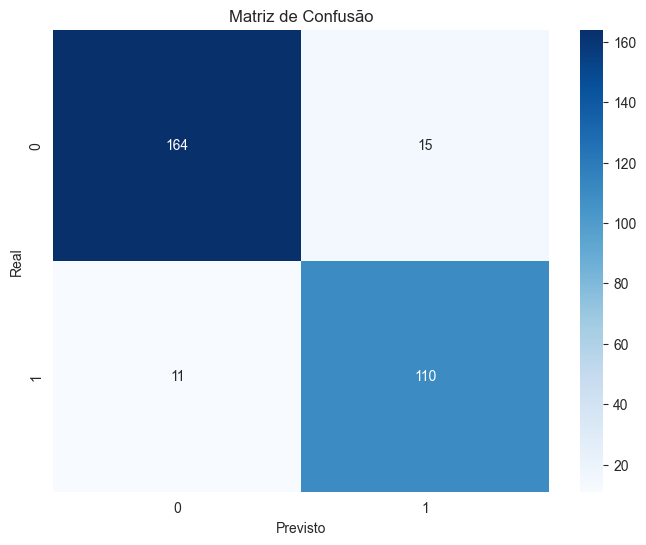

In [18]:
#SEU CÓDIGO AQUI
# =============================
# 7. Transformar prob. em classe binária
# =============================
# Definindo limiar de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

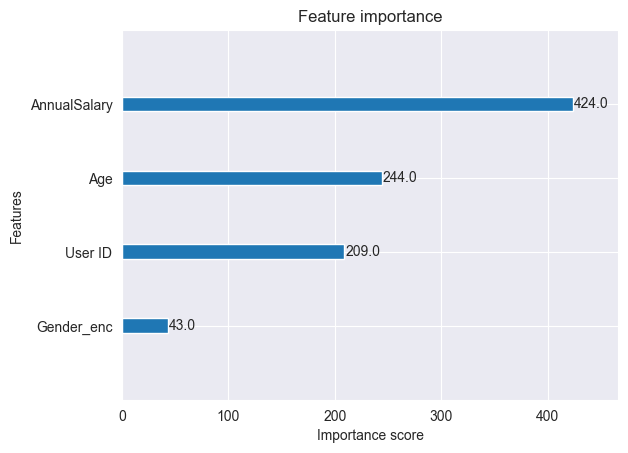

        Feature  Importance
1           Age    0.546390
2  AnnualSalary    0.316450
0       User ID    0.081311
3    Gender_enc    0.055848


In [19]:
#SEU CÓDIGO AQUI
# =============================
# 8. Feature Importance
# =============================
# Importância das variáveis
xgb.plot_importance(model, importance_type="weight")
plt.show()

# Comparando com a correlação
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances)